## Company Bankruptcy Prediction Using Machine Learning

### This project is about predicting the company bankruptcy by utilizing the accounting data and ratios with help machine learning. 

## Contents

1. Importing libraries
2. Importing and organizing data:
    - Relabling the columns
3. Preprocessing:
    - Confirming missing data
    - scaling and spliting data
    - Oversampling with SMOTE
4. Modeling:
    - k-Fold cross validation
    - Decision Tree Classifier
    - Random Forest Classifier
    - XGBoost
5. Model Analysis
    - Confusion Matrix
    - Classification report

In [1]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
# Ordered Dictionary
from collections import OrderedDict
import random

#To perform kFold Cross Validation
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

import copy as cp
import seaborn as sns
from typing import Tuple

## Importing the Data, organizing and Preprocessing
This bankruptcy prediction dataset related to the American companies in the stock market (1999-2018) on Github.
The dataset consist of accounting data from different 8262 different companies in the period between 1999 to 2018


In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame

accounting_df = pd.read_csv(Path("./Resources/american_bankruptcy_dataset.csv"))
# Review the data
display(accounting_df.head())
display(accounting_df.tail())

,company_name,status_label,year,X1,X2,X3,X4,X5,X6,X7,...,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
0,C_1,alive,1999.0,511.267,833.107,18.373,89.031,336.018,35.163,128.348,...,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,C_1,alive,2000.0,485.856,713.811,18.577,64.367,320.590,18.531,115.187,...,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,C_1,alive,2001.0,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,...,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,C_1,alive,2002.0,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,...,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,C_1,alive,2003.0,432.204,523.302,26.680,47.491,247.245,3.504,104.661,...,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467


,company_name,status_label,year,X1,X2,X3,X4,X5,X6,X7,...,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
78677,C_8971,alive,2014.0,233.211,43.338,14.094,45.615,3.376,25.261,22.846,...,104.223,1099.101,184.666,31.521,60.885,28.197,28.095,104.223,225.887,58.608
78678,C_8971,alive,2015.0,105.559,59.184,42.592,202.133,2.288,129.688,54.611,...,291.153,1865.926,770.103,159.541,231.969,88.128,157.783,291.153,880.327,89.020
78679,C_8971,alive,2016.0,63.971,69.074,65.057,79.051,2.581,-1.442,42.467,...,169.858,1746.235,683.985,13.994,100.784,85.765,156.341,169.858,770.233,90.807
78680,C_8971,alive,2017.0,135.207,66.527,65.330,69.171,2.013,-20.401,27.217,...,161.884,1736.110,694.035,3.841,95.357,82.010,135.941,161.884,776.697,92.713
78681,C_8971,alive,2018.0,82.589,68.817,65.201,67.262,2.112,-50.946,45.839,...,160.513,1625.370,632.122,2.061,91.696,79.365,84.995,160.513,712.687,93.251


In [3]:
# count number of labeled status values

accounting_df["status_label"].value_counts()

alive     73462
failed     5220
Name: status_label, dtype: int64

In [4]:
# confiming the data
accounting_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78682 entries, 0 to 78681
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company_name  78682 non-null  object 
 1   status_label  78682 non-null  object 
 2   year          78682 non-null  float64
 3   X1            78682 non-null  float64
 4   X2            78682 non-null  float64
 5   X3            78682 non-null  float64
 6   X4            78682 non-null  float64
 7   X5            78682 non-null  float64
 8   X6            78682 non-null  float64
 9   X7            78682 non-null  float64
 10  X8            78682 non-null  float64
 11  X9            78682 non-null  float64
 12  X10           78682 non-null  float64
 13  X11           78682 non-null  float64
 14  X12           78682 non-null  float64
 15  X13           78682 non-null  float64
 16  X14           78682 non-null  float64
 17  X15           78682 non-null  float64
 18  X16           78682 non-nu

In [5]:
# Dropping any missing information
accounting_df.dropna()

,company_name,status_label,year,X1,X2,X3,X4,X5,X6,X7,...,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
0,C_1,alive,1999.0,511.267,833.107,18.373,89.031,336.018,35.163,128.348,...,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,C_1,alive,2000.0,485.856,713.811,18.577,64.367,320.590,18.531,115.187,...,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,C_1,alive,2001.0,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,...,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,C_1,alive,2002.0,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,...,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,C_1,alive,2003.0,432.204,523.302,26.680,47.491,247.245,3.504,104.661,...,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78677,C_8971,alive,2014.0,233.211,43.338,14.094,45.615,3.376,25.261,22.846,...,104.223,1099.101,184.666,31.521,60.885,28.197,28.095,104.223,225.887,58.608
78678,C_8971,alive,2015.0,105.559,59.184,42.592,202.133,2.288,129.688,54.611,...,291.153,1865.926,770.103,159.541,231.969,88.128,157.783,291.153,880.327,89.020
78679,C_8971,alive,2016.0,63.971,69.074,65.057,79.051,2.581,-1.442,42.467,...,169.858,1746.235,683.985,13.994,100.784,85.765,156.341,169.858,770.233,90.807
78680,C_8971,alive,2017.0,135.207,66.527,65.330,69.171,2.013,-20.401,27.217,...,161.884,1736.110,694.035,3.841,95.357,82.010,135.941,161.884,776.697,92.713


In [6]:
# transform string value to numerical value

accounting_df["status"] = np.where(accounting_df["status_label"] == 'alive', 0, 1)

In [7]:
# verify counts matches with original column

accounting_df["status"].value_counts()

0    73462
1     5220
Name: status, dtype: int64

In [8]:
# set column names

columns = ["company_name", "status_label", "year", "current_assets", "cost_of_goods_sold", "depreciation_and_amortization", "EBITDA", "inventory", "net_income", "total_receivables", "market_value", "net_sales", "total_assets", "total_long_term_debt", "EBIT", "gross_profit", "total_current_liabilities", "retained_earnings", "total_revenue", "total_liabilities", "total_operationg_expenses", "status"]
accounting_df.columns = columns

In [9]:
# drop categorical values and review data

accounting_df = accounting_df.drop(columns=["company_name", "status_label", "year"])
accounting_df.head()

,current_assets,cost_of_goods_sold,depreciation_and_amortization,EBITDA,inventory,net_income,total_receivables,market_value,net_sales,total_assets,total_long_term_debt,EBIT,gross_profit,total_current_liabilities,retained_earnings,total_revenue,total_liabilities,total_operationg_expenses,status
0,511.267,833.107,18.373,89.031,336.018,35.163,128.348,372.7519,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302,0
1,485.856,713.811,18.577,64.367,320.590,18.531,115.187,377.1180,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888,0
2,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,364.5928,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514,0
3,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,143.3295,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592,0
4,432.204,523.302,26.680,47.491,247.245,3.504,104.661,308.9071,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467,0


In [10]:
# save cleaned data to new csv file

accounting_df.to_csv(Path("Resources/accounting_data.csv"), index=False)

In [11]:
# import and review new csv file

accounting_df = pd.read_csv(Path("Resources/accounting_data.csv"))
accounting_df.head()

,current_assets,cost_of_goods_sold,depreciation_and_amortization,EBITDA,inventory,net_income,total_receivables,market_value,net_sales,total_assets,total_long_term_debt,EBIT,gross_profit,total_current_liabilities,retained_earnings,total_revenue,total_liabilities,total_operationg_expenses,status
0,511.267,833.107,18.373,89.031,336.018,35.163,128.348,372.7519,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302,0
1,485.856,713.811,18.577,64.367,320.590,18.531,115.187,377.1180,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888,0
2,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,364.5928,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514,0
3,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,143.3295,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592,0
4,432.204,523.302,26.680,47.491,247.245,3.504,104.661,308.9071,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467,0


In [12]:
# import modules required for data modification

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [13]:
# split data into X and y
X = accounting_df.drop(columns="status")
y = accounting_df["status"]
display(X.tail())
display(y.tail())

,current_assets,cost_of_goods_sold,depreciation_and_amortization,EBITDA,inventory,net_income,total_receivables,market_value,net_sales,total_assets,total_long_term_debt,EBIT,gross_profit,total_current_liabilities,retained_earnings,total_revenue,total_liabilities,total_operationg_expenses
78677,233.211,43.338,14.094,45.615,3.376,25.261,22.846,756.4827,104.223,1099.101,184.666,31.521,60.885,28.197,28.095,104.223,225.887,58.608
78678,105.559,59.184,42.592,202.133,2.288,129.688,54.611,527.5750,291.153,1865.926,770.103,159.541,231.969,88.128,157.783,291.153,880.327,89.020
78679,63.971,69.074,65.057,79.051,2.581,-1.442,42.467,578.8868,169.858,1746.235,683.985,13.994,100.784,85.765,156.341,169.858,770.233,90.807
78680,135.207,66.527,65.330,69.171,2.013,-20.401,27.217,412.6241,161.884,1736.110,694.035,3.841,95.357,82.010,135.941,161.884,776.697,92.713
78681,82.589,68.817,65.201,67.262,2.112,-50.946,45.839,354.1786,160.513,1625.370,632.122,2.061,91.696,79.365,84.995,160.513,712.687,93.251


78677    0
78678    0
78679    0
78680    0
78681    0
Name: status, dtype: int64

In [14]:
# create training dataset csv file

X_scaler = StandardScaler()
X_train_scaled = X_scaler.fit_transform(X)
train_not_resampled = pd.concat([pd.DataFrame(X_train_scaled), pd.Series(y).reset_index(drop=True)], axis=1)
train_not_resampled.columns = accounting_df.columns
train_not_resampled.to_csv(Path("Resources/training_dataset_original_accounting.csv"), index=False)
train_not_resampled.head()

,current_assets,cost_of_goods_sold,depreciation_and_amortization,EBITDA,inventory,net_income,total_receivables,market_value,net_sales,total_assets,total_long_term_debt,EBIT,gross_profit,total_current_liabilities,retained_earnings,total_revenue,total_liabilities,total_operationg_expenses,status
0,-0.093952,-0.085262,-0.157673,-0.143005,0.126713,-0.074451,-0.118629,-0.165179,-0.112108,-0.164587,-0.167184,-0.123687,-0.153196,-0.151872,-0.052039,-0.112108,-0.170368,-0.100960,0
1,-0.100421,-0.098620,-0.157360,-0.155264,0.112169,-0.087593,-0.128480,-0.164942,-0.124667,-0.167617,-0.167326,-0.140325,-0.161351,-0.164949,-0.051562,-0.124667,-0.175315,-0.112996,0
2,-0.112944,-0.119597,-0.151353,-0.173733,0.080115,-0.148809,-0.156669,-0.165622,-0.144377,-0.166971,-0.155694,-0.167810,-0.174120,-0.156416,-0.061683,-0.144377,-0.170557,-0.132035,0
3,-0.123188,-0.122926,-0.144185,-0.171974,0.055006,-0.112042,-0.165057,-0.177638,-0.147087,-0.168796,-0.172054,-0.168571,-0.174823,-0.138341,-0.064116,-0.147087,-0.171591,-0.135482,0
4,-0.114078,-0.119952,-0.144939,-0.163651,0.043025,-0.099467,-0.136359,-0.168646,-0.143269,-0.167041,-0.146143,-0.157038,-0.169772,-0.162951,-0.062895,-0.143269,-0.169607,-0.132711,0


In [15]:
# Create the labels set (`y`)  from the “status” column, and then create the features (`X`) DataFrame from the remaining columns.

X_train = accounting_df.drop(columns="status")
y_train = accounting_df["status"]
display(X_train.tail())
display(y_train[-5:])

,current_assets,cost_of_goods_sold,depreciation_and_amortization,EBITDA,inventory,net_income,total_receivables,market_value,net_sales,total_assets,total_long_term_debt,EBIT,gross_profit,total_current_liabilities,retained_earnings,total_revenue,total_liabilities,total_operationg_expenses
78677,233.211,43.338,14.094,45.615,3.376,25.261,22.846,756.4827,104.223,1099.101,184.666,31.521,60.885,28.197,28.095,104.223,225.887,58.608
78678,105.559,59.184,42.592,202.133,2.288,129.688,54.611,527.5750,291.153,1865.926,770.103,159.541,231.969,88.128,157.783,291.153,880.327,89.020
78679,63.971,69.074,65.057,79.051,2.581,-1.442,42.467,578.8868,169.858,1746.235,683.985,13.994,100.784,85.765,156.341,169.858,770.233,90.807
78680,135.207,66.527,65.330,69.171,2.013,-20.401,27.217,412.6241,161.884,1736.110,694.035,3.841,95.357,82.010,135.941,161.884,776.697,92.713
78681,82.589,68.817,65.201,67.262,2.112,-50.946,45.839,354.1786,160.513,1625.370,632.122,2.061,91.696,79.365,84.995,160.513,712.687,93.251


78677    0
78678    0
78679    0
78680    0
78681    0
Name: status, dtype: int64

## Predicting Models using oversampling with SMOTE
Using the `oversampling with SMOTE` module from the imbalanced-learn library to resample the data

In [16]:

# Import the SMOTE module form imbalanced-learn
from imblearn.over_sampling import SMOTE

# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
smote_oversampler = SMOTE( random_state=1)


# Fit the original training data to the random_oversampler model
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)

In [17]:
# Count the distinct values of the resampled labels data
y_resampled.value_counts()


0    73462
1    73462
Name: status, dtype: int64

### Creating the model instances

In [39]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators = 5, criterion = 'entropy')

In [42]:
# eXtreme Gradient Boosting Classifier (XGBClassifier)
xgb_classifier = XGBClassifier()

In [47]:
# creating a dictionary of models
models_dictionary = OrderedDict()

models_dictionary['Random Forest'] = rf_classifier
models_dictionary['Decision Tree'] = dt_classifier
models_dictionary['Extreme Gradient Boosting'] = xgb_classifier


In [48]:
# perform data modeling
def perform_data_modeling_test(_models_, X, y, verbose=False, k_folds=4):
    
    
    
    X = X.values
    y = y.values
    
    # Iterate over the models to print model name
    for model_name, clf in _models_.items():
        if verbose: print("-"*120, "\n", "Model: " + '\033[1m' + model_name + '\033[0m' + " Classifier")
                     
        # creating empty list for actual_class and predicted_class        
        no_classes = len(np.unique(y))
        actual_classes = np.empty([0], dtype=int)
        predicted_classes = np.empty([0], dtype=int)
        
        # Iterate over all the k-folds
        kfold = KFold(n_splits=k_folds, random_state=42, shuffle=True)
        for train_ndx, test_ndx in kfold.split(X):

            train_X, train_y, test_X, test_y = X[train_ndx], y[train_ndx], X[test_ndx], y[test_ndx]

            actual_classes = np.append(actual_classes, test_y)

            clf.fit(train_X, train_y)
            predicted_classes = np.append(predicted_classes, clf.predict(test_X))

        # Printing Confusion Matrix   
        sorted_labels =  [0, 1]   
        matrix = confusion_matrix(actual_classes, predicted_classes, labels=sorted_labels)
        
        
        confusion_matrix_values = np.mat(matrix) 
        classnames = list(set(y))
        confusion_matrix_df = pd.DataFrame(
                confusion_matrix_values
            )
        print(confusion_matrix_df)
        
        # ploting confusion matrix
        plt.figure(figsize=(12.8,6))
        sns.heatmap(matrix, annot=True, xticklabels=sorted_labels, yticklabels=sorted_labels, cmap="Blues", fmt="g")
        plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.title('Confusion Matrix')

        plt.show()
        
        # printing classification report
        print(classification_report(actual_classes, predicted_classes))
       
        
      

------------------------------------------------------------------------------------------------------------------------ 
 Model: Random Forest Classifier
       0      1
0  65986   7476
1   4282  69180


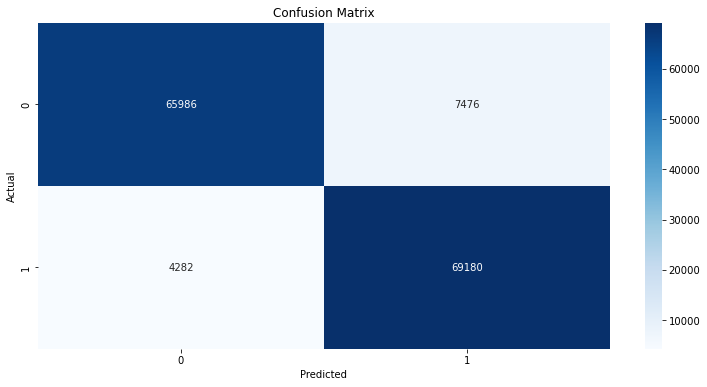

              precision    recall  f1-score   support

           0       0.94      0.90      0.92     73462
           1       0.90      0.94      0.92     73462

    accuracy                           0.92    146924
   macro avg       0.92      0.92      0.92    146924
weighted avg       0.92      0.92      0.92    146924

------------------------------------------------------------------------------------------------------------------------ 
 Model: Decision Tree Classifier
       0      1
0  63014  10448
1   6931  66531


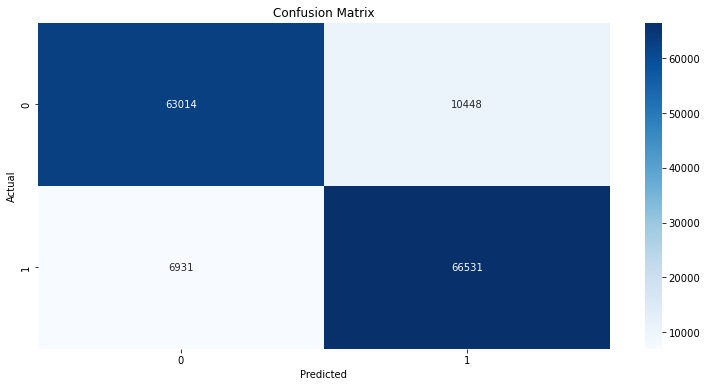

              precision    recall  f1-score   support

           0       0.90      0.86      0.88     73462
           1       0.86      0.91      0.88     73462

    accuracy                           0.88    146924
   macro avg       0.88      0.88      0.88    146924
weighted avg       0.88      0.88      0.88    146924

------------------------------------------------------------------------------------------------------------------------ 
 Model: Extreme Gradient Boosting Classifier
       0      1
0  60043  13419
1   8019  65443


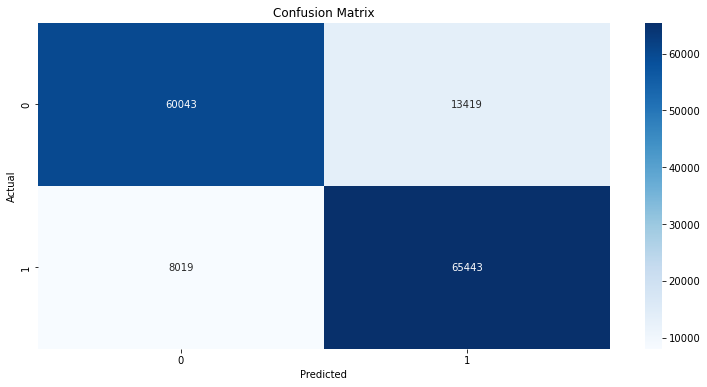

              precision    recall  f1-score   support

           0       0.88      0.82      0.85     73462
           1       0.83      0.89      0.86     73462

    accuracy                           0.85    146924
   macro avg       0.86      0.85      0.85    146924
weighted avg       0.86      0.85      0.85    146924

------------------------------------------------------------------------------------------------------------------------ 
 Model:  Support Vector Machine Classifier


In [ ]:
perform_data_modeling_test(models_dictionary,X_resampled, y_resampled,verbose=True, k_folds=4)

## Conclusion
Above shows the evaluation for the 3 classification models: Random Forests, Decision Tree, and XG Boost. While all 3 models are performing well, 
Random Forests gave the maximum accuracy. Both precision and recall showed 90%+ with F1 score of 92%. Primary drivers for model performance was to ensure the data is balanced, scaled and cleaned. Balanced data was achieved by oversampling minority class labels using Synthetic Miniority Oversampling technique. 
Kfold technique was used for model evaluation and this helped with giving better insights into our data and model.
